# Esteban Ocon

<img src="https://www.formula1.com/content/fom-website/en/drivers/esteban-ocon/_jcr_content/image.img.1920.medium.jpg/1641815774959.jpg" width="300">

### Team: Alpine

<img src ="https://www.formula1.com/content/fom-website/en/drivers/esteban-ocon/_jcr_content/helmet.img.png/1617101189029.png" width="200">


In [1]:
library (tidyverse)
library (tidymodels)
source("source/master_functions.r")
source("source/regression.r")
source("source/prediction.r")
set.seed(620)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

In [2]:
initialize_master()

Parsed with column specification:
cols(
  circuitId = col_double(),
  circuitRef = col_character(),
  name = col_character(),
  location = col_character(),
  country = col_character(),
  lat = col_double(),
  lng = col_double(),
  alt = col_character(),
  url = col_character()
)

Parsed with column specification:
cols(
  constructorStandingsId = col_double(),
  raceId = col_double(),
  constructorId = col_double(),
  points = col_double(),
  position = col_double(),
  positionText = col_character(),
  wins = col_double()
)

Parsed with column specification:
cols(
  constructorResultsId = col_double(),
  raceId = col_double(),
  constructorId = col_double(),
  points = col_double(),
  status = col_character()
)

Parsed with column specification:
cols(
  constructorId = col_double(),
  constructorRef = col_character(),
  name = col_character(),
  nationality = col_character(),
  url = col_character()
)

Parsed with column specification:
cols(
  driverId = col_double(),
  driverRef = col_

In [3]:
# Filtering Lap Data For 2022 Drivers

lap_data <- lap_times %>%
            filter(driverId %in% driver_ids) %>%
            filter(raceId %in% race_ids)

# Filtering Lap Data For Individual Driver

oco_laps <- lap_data %>%
            filter(driverId == 839)

# Season Analysis

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
971,57
1045,57
990,56
1052,55


`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5763201,96.05334,1.600889


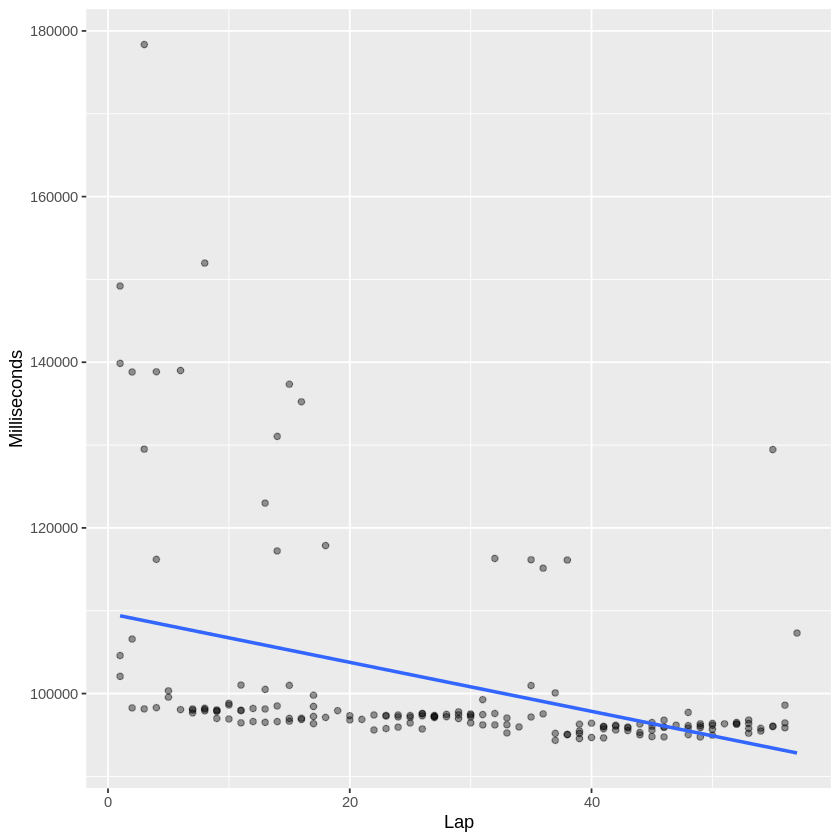

In [4]:
#1. Bahrain

eo_bahrain <- oco_laps %>%
                filter(raceId %in% bahrain_race_ID) 

eo_bahrain_clean <- eo_bahrain %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n))
eo_bahrain_clean
eo_bahrain_clean_ID <- eo_bahrain_clean %>%
                        pull(raceId)


### SPLITTING DATA

eo_bahrain_races <- oco_laps %>%
                    filter(raceId %in% eo_bahrain_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(eo_bahrain_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_bahrain_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1072,50


Warning message:
“The number of observations in each quantile is below the recommended threshold of 20. Stratification will be done with 2 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5411118,90.18531,1.503088


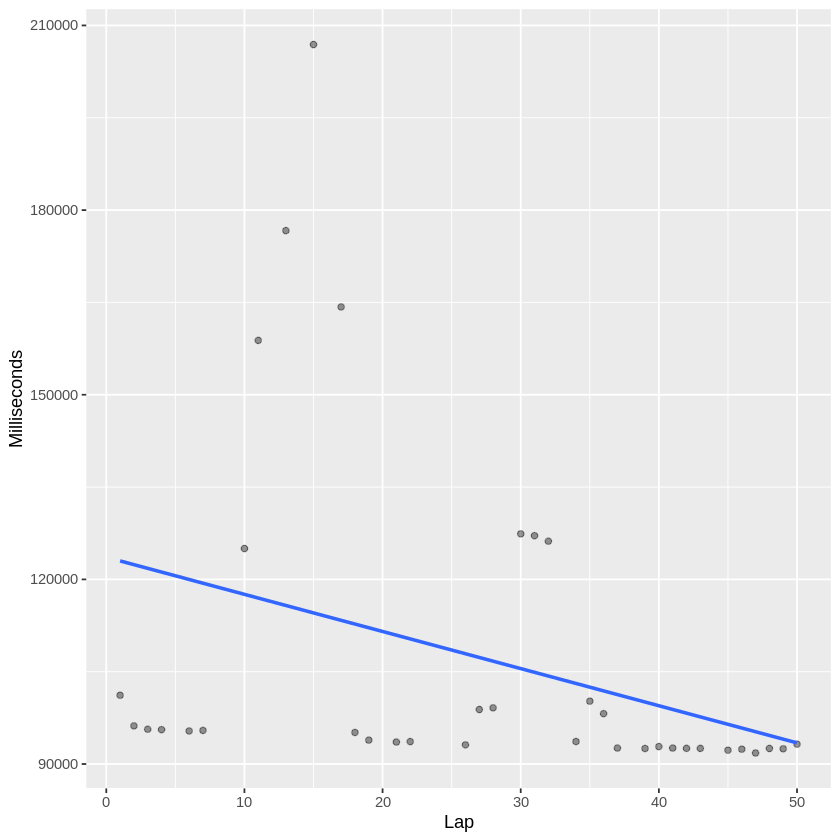

In [5]:
#2. Saudi Arabia

eo_saudi <- oco_laps %>%
                filter(raceId %in% saudi_race_ID) 

eo_saudi_clean <- eo_saudi %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
eo_saudi_clean
eo_saudi_clean_ID <- eo_saudi_clean %>%
                        pull(raceId)


### SPLITTING DATA

eo_saudi_races <- oco_laps %>%
                    filter(raceId %in% eo_saudi_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(3:1000)

formulaone_split <- initial_split(eo_saudi_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_sa_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
989,58
969,56


`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5366827,89.44712,1.490785


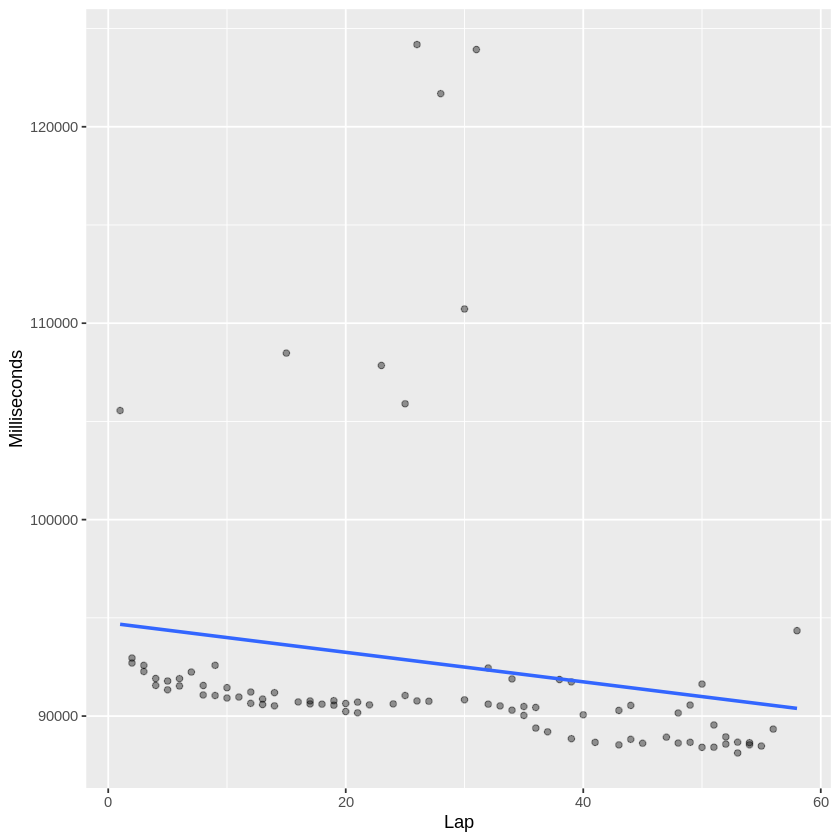

In [6]:
#3. Australia

eo_aus <- oco_laps %>%
                filter(raceId %in% aus_race_ID) 

eo_aus_clean <- eo_aus %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
eo_aus_clean
eo_aus_clean_ID <- eo_aus_clean %>%
                        pull(raceId)


### SPLITTING DATA

eo_aus_races <- oco_laps %>%
                    filter(raceId %in% eo_aus_clean_ID)

formulaone_split <- initial_split(eo_aus_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_australia_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1053,63
1043,27


`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5625416,93.75693,1.562615


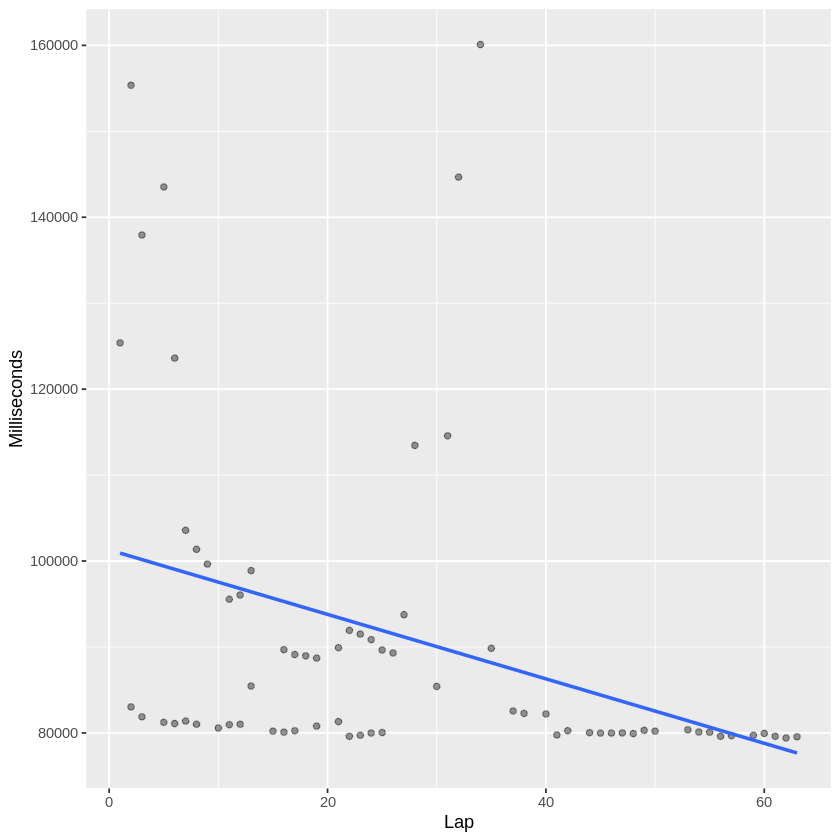

In [7]:
#4. Italy, Imola

eo_imola <- oco_laps %>%
                filter(raceId %in% imola_race_ID) 

eo_imola_clean <- eo_imola %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
eo_imola_clean
eo_imola_clean_ID <- eo_imola_clean %>%
                        pull(raceId)


### SPLITTING DATA

eo_imola_races <- oco_laps %>%
                    filter(raceId %in% eo_imola_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(eo_imola_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_imola_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1044,57
1067,57


`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5805454,96.75756,1.612626


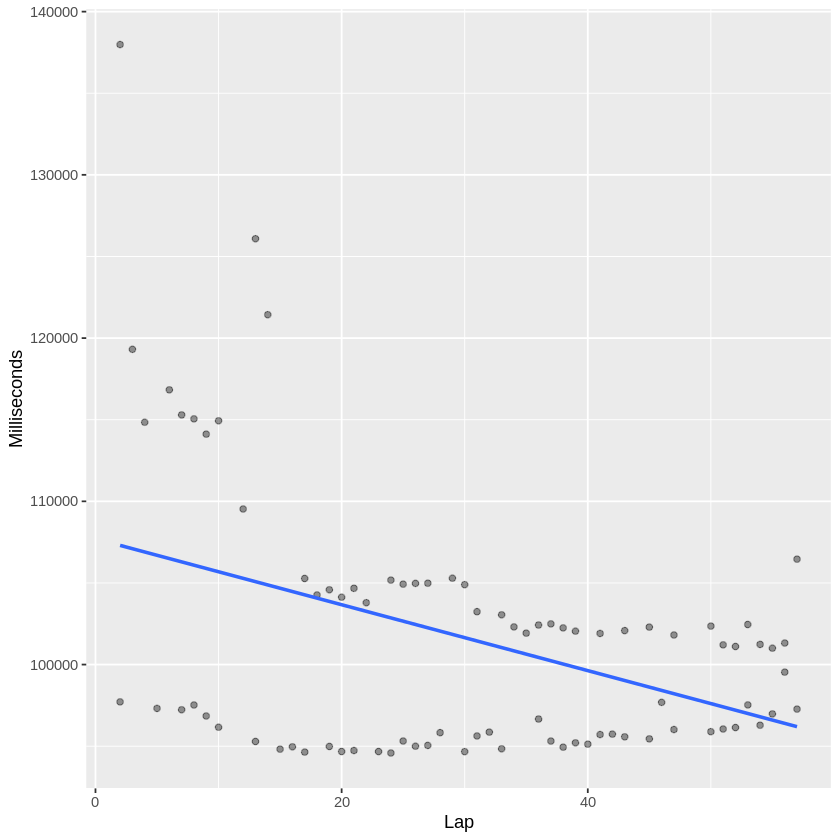

In [8]:
#5. Turkey (Replacing Miami)

eo_turkey <- oco_laps %>%
                filter(raceId %in% turkey_race_ID) 

eo_turkey_clean <- eo_turkey %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
eo_turkey_clean
eo_turkey_clean_ID <- eo_turkey_clean %>%
                        pull(raceId)


### SPLITTING DATA

eo_turkey_races <- oco_laps %>%
                    filter(raceId %in% eo_turkey_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(eo_turkey_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_miami_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
973,65
1036,65
1055,65
993,38


`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5811401,96.85669,1.614278


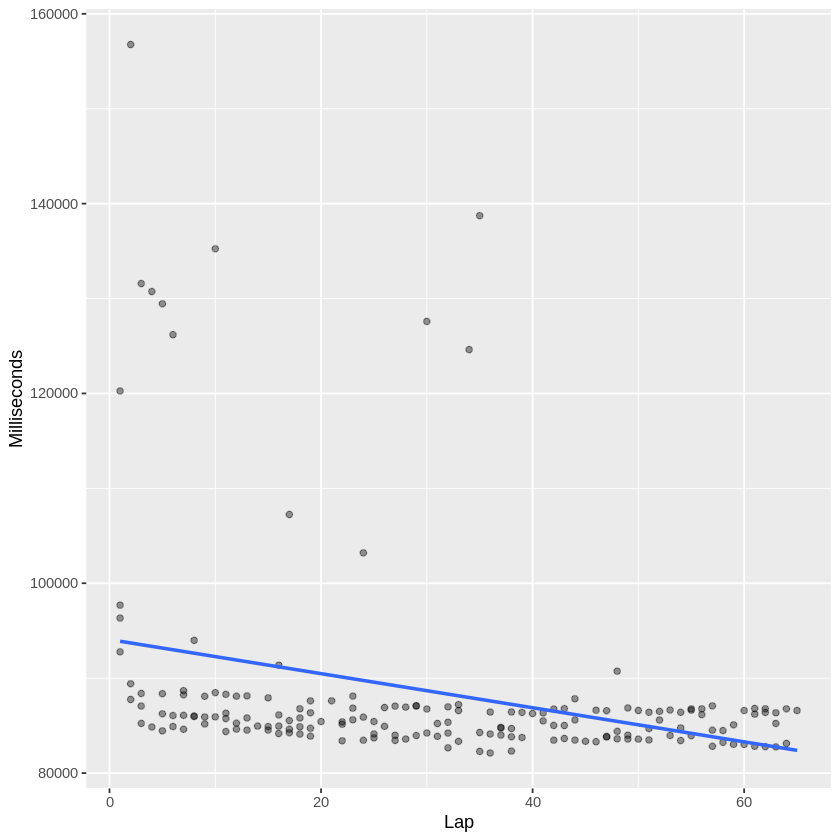

In [9]:
#6. Spain

eo_spain <- oco_laps %>%
                filter(raceId %in% spain_race_ID) 

eo_spain_clean <- eo_spain %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
eo_spain_clean
eo_spain_clean_ID <- eo_spain_clean %>%
                        pull(raceId)


### SPLITTING DATA

eo_spain_races <- oco_laps %>%
                    filter(raceId %in% eo_spain_clean_ID)

formulaone_split <- initial_split(eo_spain_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_spain_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
974,78
994,78
1056,77


`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
6179304,102.9884,1.716473


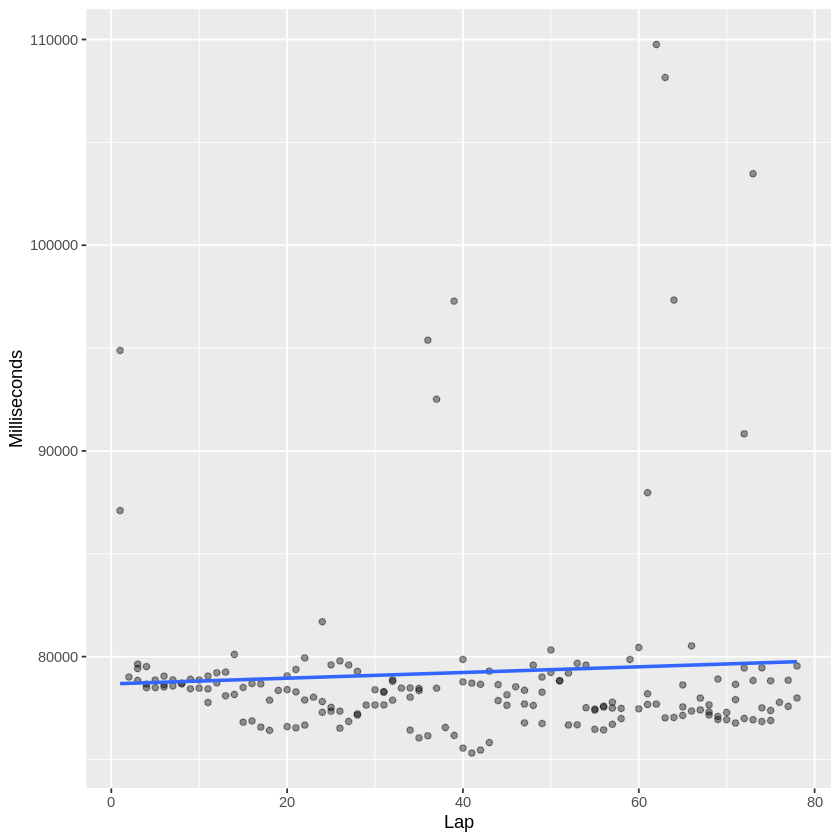

In [10]:
#7. Monaco

eo_monaco <- oco_laps %>%
                filter(raceId %in% monaco_race_ID) 

eo_monaco_clean <- eo_monaco %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
eo_monaco_clean
eo_monaco_clean_ID <- eo_monaco_clean %>%
                        pull(raceId)


### SPLITTING DATA

eo_monaco_races <- oco_laps %>%
                    filter(raceId %in% eo_monaco_clean_ID)

formulaone_split <- initial_split(eo_monaco_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_monaco_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
976,51
1057,3


Warning message:
“The number of observations in each quantile is below the recommended threshold of 20. Stratification will be done with 2 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
6083681,101.3947,1.689911


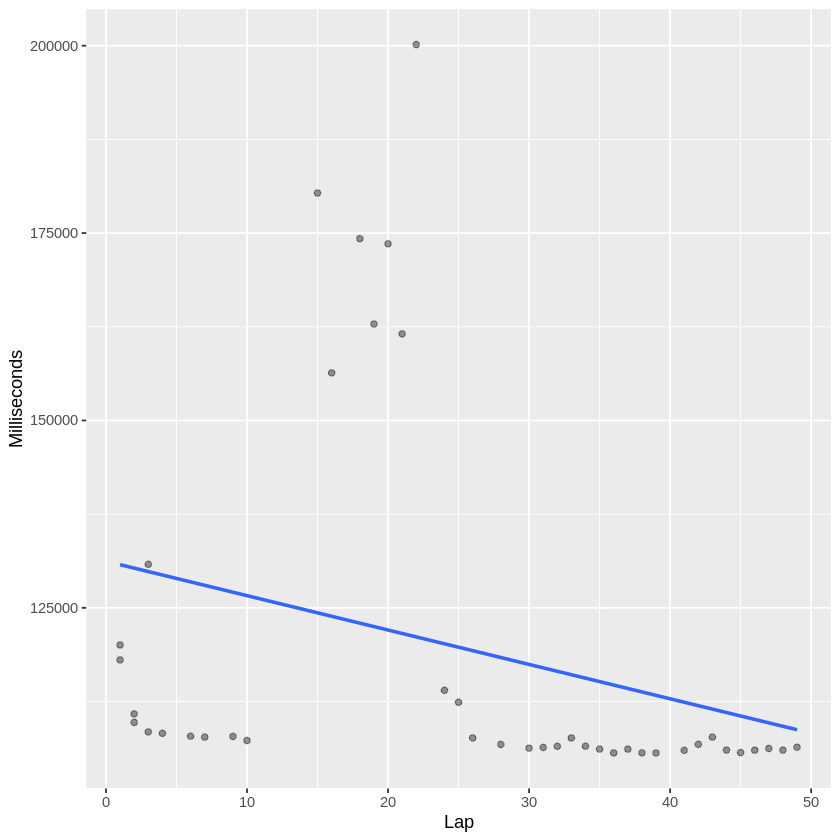

In [11]:
#8. Azerbaijan

eo_azerbaijan <- oco_laps %>%
                filter(raceId %in% azerbaijan_race_ID) 

eo_azerbaijan_clean <- eo_azerbaijan %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
eo_azerbaijan_clean
eo_azerbaijan_clean_ID <- eo_azerbaijan_clean %>%
                        pull(raceId)


### SPLITTING DATA

eo_azerbaijan_races <- oco_laps %>%
                    filter(raceId %in% eo_azerbaijan_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(eo_azerbaijan_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_azerbaijan_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
975,70
995,67


`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5604174,93.40289,1.556715


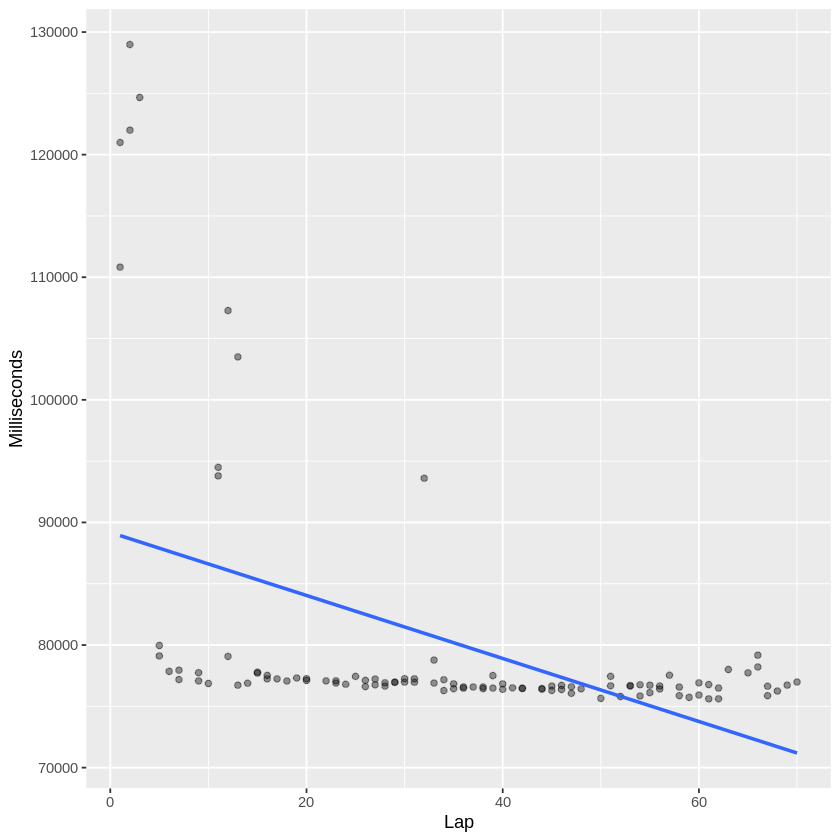

In [12]:
#9. Canada

eo_canada <- oco_laps %>%
                filter(raceId %in% canada_race_ID) 

eo_canada_clean <- eo_canada %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
eo_canada_clean
eo_canada_clean_ID <- eo_canada_clean %>%
                        pull(raceId)


### SPLITTING DATA

eo_canada_races <- oco_laps %>%
                    filter(raceId %in% eo_canada_clean_ID)

formulaone_split <- initial_split(eo_canada_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_canada_prediction()

`summarise()` ungrouping output (override with `.groups` argument)

`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5099272,84.98786,1.416464


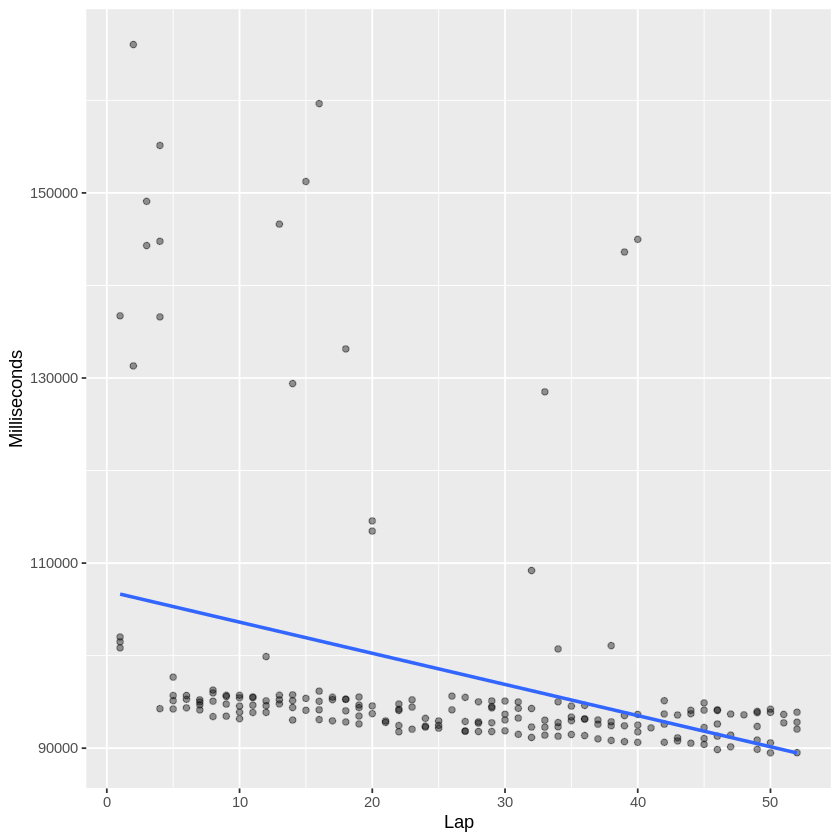

In [13]:
#10. Great Britain

eo_uk <- oco_laps %>%
                filter(raceId %in% uk_race_ID) 

eo_uk_clean <- eo_uk %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 

eo_uk_clean_ID <- eo_uk_clean %>%
                        pull(raceId)


### SPLITTING DATA

eo_uk_races <- oco_laps %>%
                    filter(raceId %in% eo_uk_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(eo_uk_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_uk_prediction()

`summarise()` ungrouping output (override with `.groups` argument)

`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5142450,85.7075,1.428458


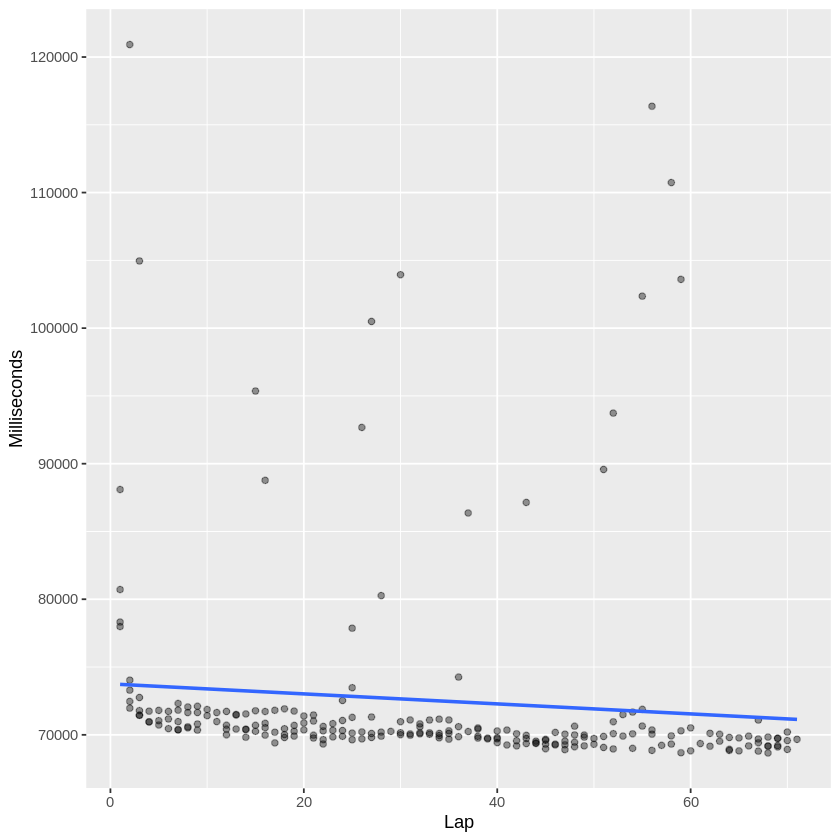

In [14]:
#11. Austria

eo_austria <- oco_laps %>%
                filter(raceId %in% austria_race_ID) 

eo_austria_clean <- eo_austria %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 

eo_austria_clean_ID <- eo_austria_clean %>%
                        pull(raceId)


### SPLITTING DATA

eo_austria_races <- oco_laps %>%
                    filter(raceId %in% eo_austria_clean_ID)

formulaone_split <- initial_split(eo_austria_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_austria_prediction()

In [15]:
#12. France

# eo_france <- oco_laps %>%
#                 filter(raceId %in% france_race_ID) 

# eo_france_clean <- eo_france %>%
#                         group_by(raceId) %>%
#                         summarize(n = n()) %>%
#                         arrange(desc(n)) 
# eo_france_clean
# eo_france_clean_ID <- eo_france_clean %>%
#                         pull(raceId)


# ### SPLITTING DATA

# eo_france_races <- oco_laps %>%
#                     filter(raceId %in% eo_france_clean_ID) %>%
#                     arrange(by = desc(milliseconds)) %>%
#                     slice(2:1000)

# formulaone_split <- initial_split(eo_france_races, prop = 0.75, strata = milliseconds)

# initiate_split_data()

# ### RUNS REGRESSION

# initiate_linear_regression()

# ### GETS PREDICTION

# get_france_prediction()

`summarise()` ungrouping output (override with `.groups` argument)

`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5954511,99.24185,1.654031


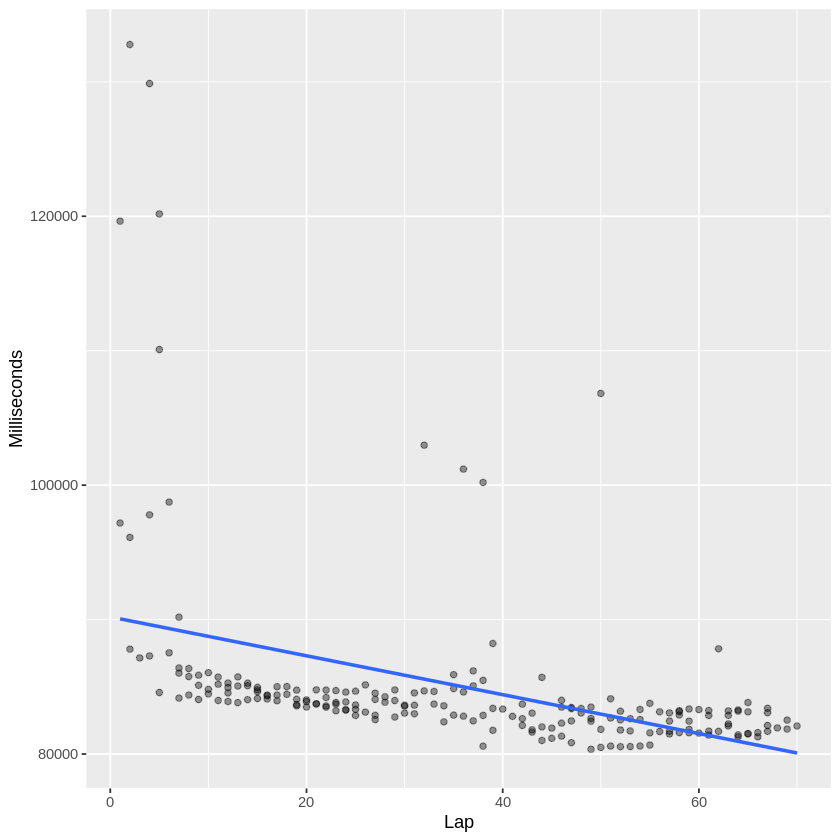

In [16]:
#13. Hungary

eo_hungary <- oco_laps %>%
                filter(raceId %in% hungary_race_ID) 

eo_hungary_clean <- eo_hungary %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
                     

eo_hungary_clean_ID <- eo_hungary_clean %>%
                        pull(raceId)


### SPLITTING DATA

eo_hungary_races <- oco_laps %>%
                    filter(raceId %in% eo_hungary_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(3:1000)

formulaone_split <- initial_split(eo_hungary_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_hungary_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
980,44
1001,44
1037,44
960,43
1063,1


`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5198342,86.63903,1.443984


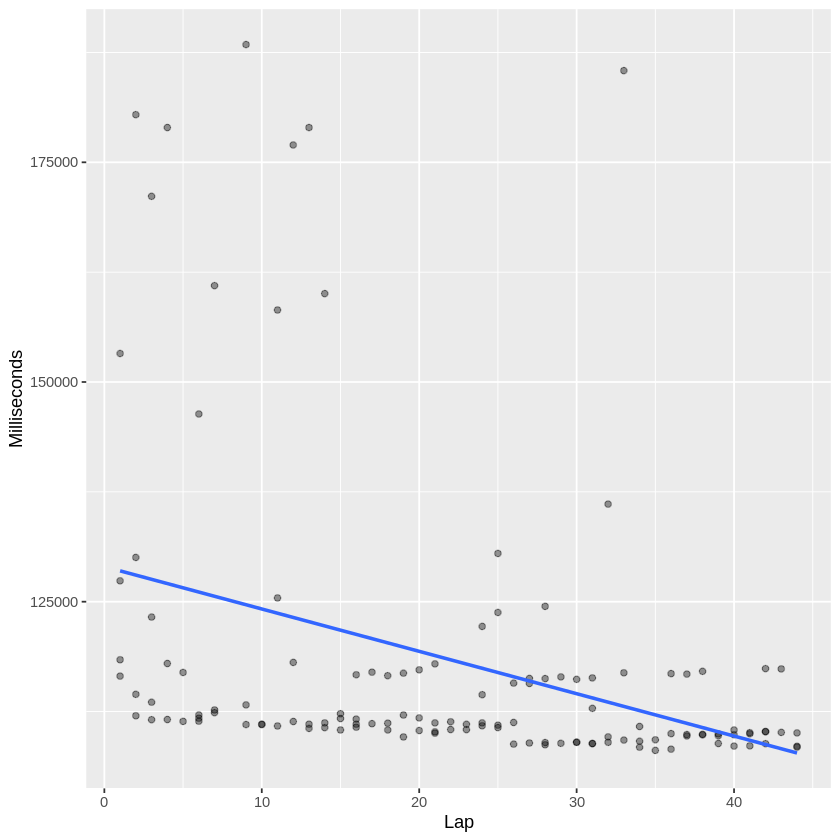

In [17]:
#14. Belgium

eo_belgium <- oco_laps %>%
                filter(raceId %in% belgium_race_ID) 

eo_belgium_clean <- eo_belgium %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
eo_belgium_clean
eo_belgium_clean_ID <- eo_belgium_clean %>%
                        pull(raceId)


### SPLITTING DATA

eo_belgium_races <- oco_laps %>%
                    filter(raceId %in% eo_belgium_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(3:1000)

formulaone_split <- initial_split(eo_belgium_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_belgium_prediction()

`summarise()` ungrouping output (override with `.groups` argument)

Warning message:
“The number of observations in each quantile is below the recommended threshold of 20. Stratification will be done with 3 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5534418,92.2403,1.537338


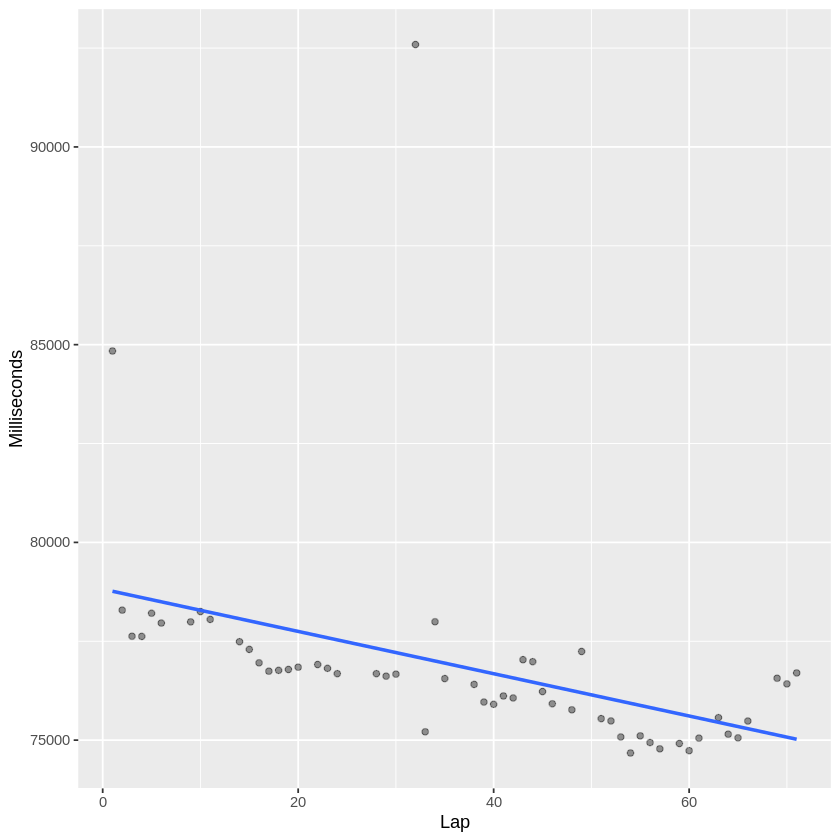

In [18]:
#15. Netherlands

eo_netherlands <- oco_laps %>%
                filter(raceId %in% netherlands_race_ID) 

eo_netherlands_clean <- eo_netherlands %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 

eo_netherlands_clean_ID <- eo_netherlands_clean %>%
                        pull(raceId)


### SPLITTING DATA

eo_netherlands_races <- oco_laps %>%
                    filter(raceId %in% eo_netherlands_clean_ID)

formulaone_split <- initial_split(eo_netherlands_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_netherlands_prediction()

`summarise()` ungrouping output (override with `.groups` argument)

`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
4800834,80.01391,1.333565


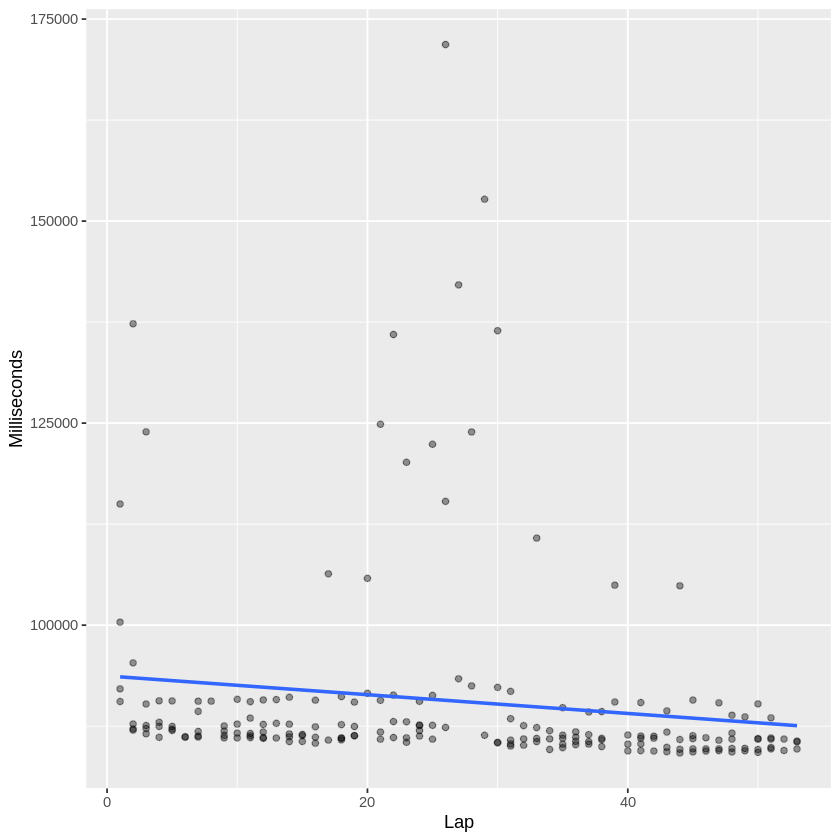

In [19]:
#16. Italy, Monza

eo_monza <- oco_laps %>%
                filter(raceId %in% monza_race_ID) 

eo_monza_clean <- eo_monza %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n))

eo_monza_clean_ID <- eo_monza_clean %>%
                        pull(raceId)


### SPLITTING DATA

eo_monza_races <- oco_laps %>%
                    filter(raceId %in% eo_monza_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(eo_monza_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_monza_prediction()

`summarise()` ungrouping output (override with `.groups` argument)

`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
7472041,124.534,2.075567


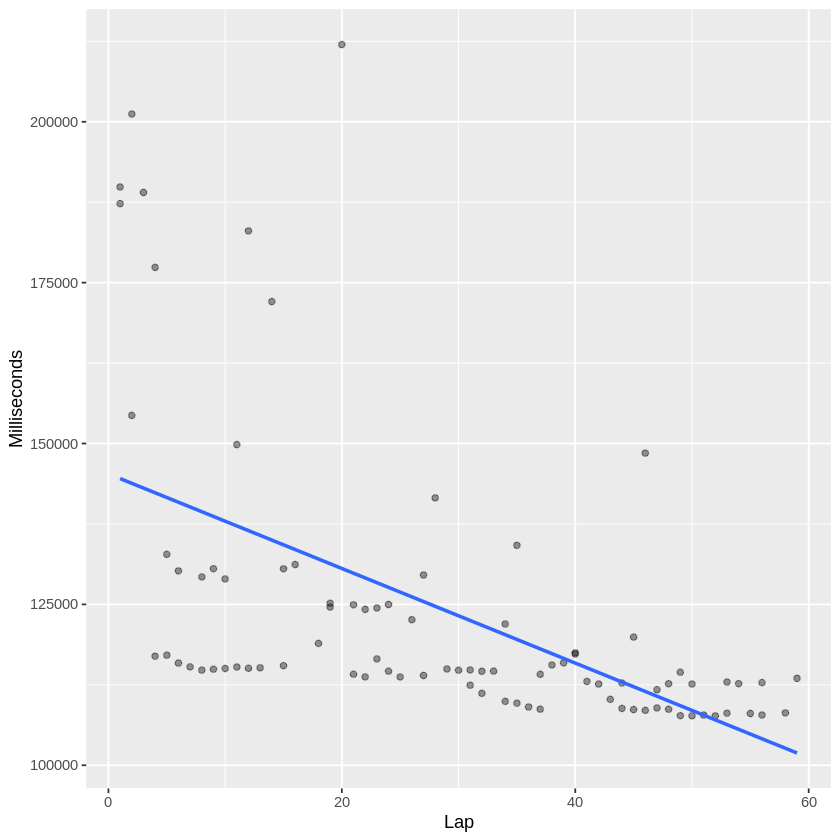

In [20]:
#17. Singapore

eo_singapore <- oco_laps %>%
                filter(raceId %in% singapore_race_ID) 

eo_singapore_clean <- eo_singapore %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 

eo_singapore_clean_ID <- eo_singapore_clean %>%
                        pull(raceId)


### SPLITTING DATA

eo_singapore_races <- oco_laps %>%
                    filter(raceId %in% eo_singapore_clean_ID)

formulaone_split <- initial_split(eo_singapore_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_singapore_prediction()

`summarise()` ungrouping output (override with `.groups` argument)

`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5337032,88.95054,1.482509


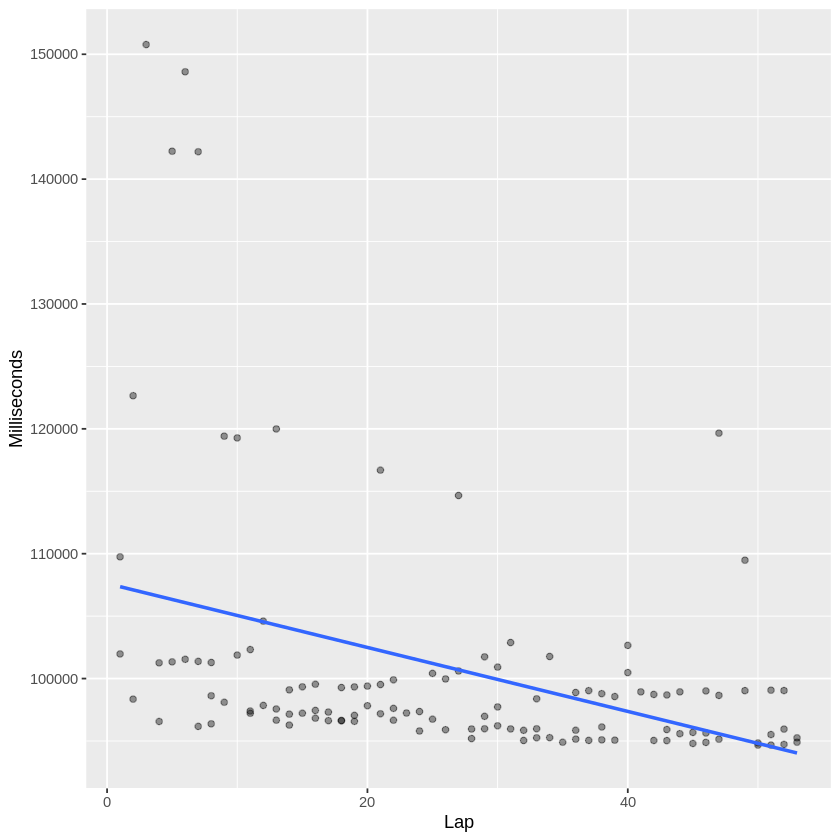

In [21]:
#18. Japan

eo_japan <- oco_laps %>%
                filter(raceId %in% japan_race_ID) 

eo_japan_clean <- eo_japan %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
eo_japan_clean_ID <- eo_japan_clean %>%
                        pull(raceId)


### SPLITTING DATA

eo_japan_races <- oco_laps %>%
                    filter(raceId %in% eo_japan_clean_ID)

formulaone_split <- initial_split(eo_japan_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_japan_prediction()

`summarise()` ungrouping output (override with `.groups` argument)

`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5871549,97.85915,1.630986


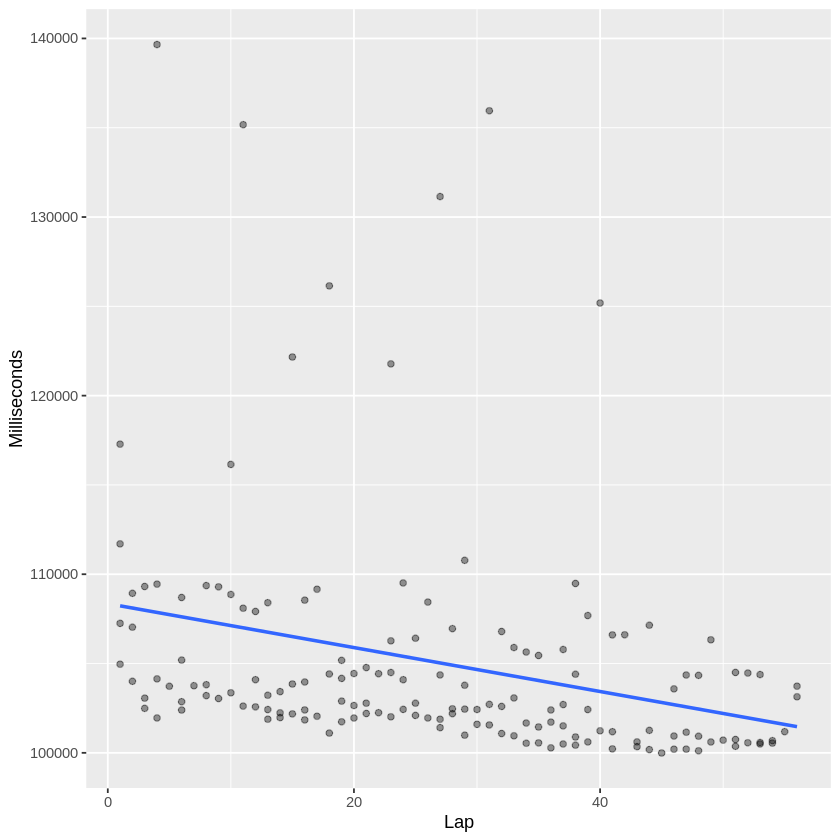

In [22]:
#19. USA, Austin

eo_austin <- oco_laps %>%
                filter(raceId %in% austin_race_ID) 

eo_austin_clean <- eo_austin %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 

eo_austin_clean_ID <- eo_austin_clean %>%
                        pull(raceId)


### SPLITTING DATA

eo_austin_races <- oco_laps %>%
                    filter(raceId %in% eo_austin_clean_ID)

formulaone_split <- initial_split(eo_austin_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_austin_prediction()

`summarise()` ungrouping output (override with `.groups` argument)

`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
6074957,101.2493,1.687488


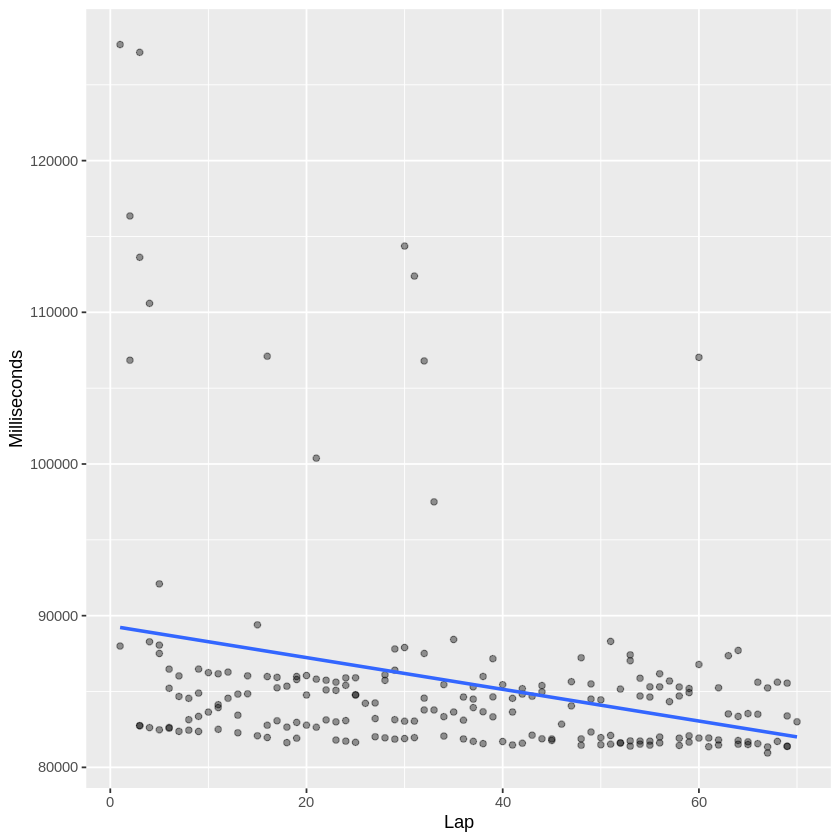

In [23]:
#20. Mexico

eo_mexico <- oco_laps %>%
                filter(raceId %in% mexico_race_ID) 

eo_mexico_clean <- eo_mexico %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 

eo_mexico_clean_ID <- eo_mexico_clean %>%
                        pull(raceId)


### SPLITTING DATA

eo_mexico_races <- oco_laps %>%
                    filter(raceId %in% eo_mexico_clean_ID)

formulaone_split <- initial_split(eo_mexico_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_mexico_prediction()

`summarise()` ungrouping output (override with `.groups` argument)

`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
6124147,102.0691,1.701152


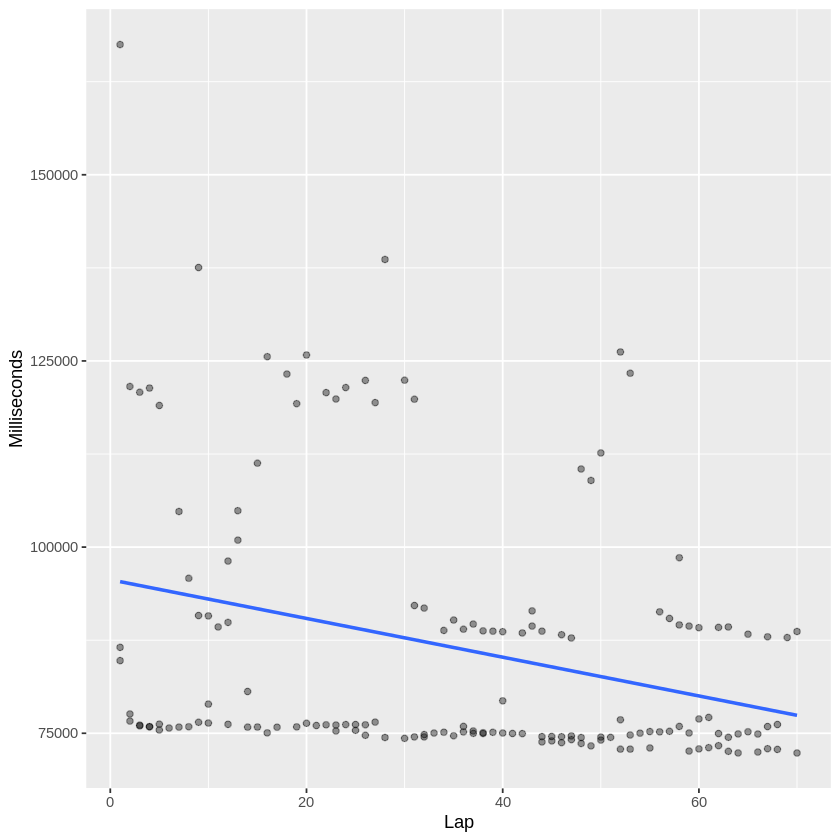

In [24]:
#21. Brazil

eo_brazil <- oco_laps %>%
                filter(raceId %in% brazil_race_ID) 

eo_brazil_clean <- eo_brazil %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 

eo_brazil_clean_ID <- eo_brazil_clean %>%
                        pull(raceId)


### SPLITTING DATA

eo_brazil_races <- oco_laps %>%
                    filter(raceId %in% eo_brazil_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(3:1000)

formulaone_split <- initial_split(eo_brazil_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_brazil_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1073,58
988,55
1047,55
968,54
1009,44


`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
6078770,101.3128,1.688547


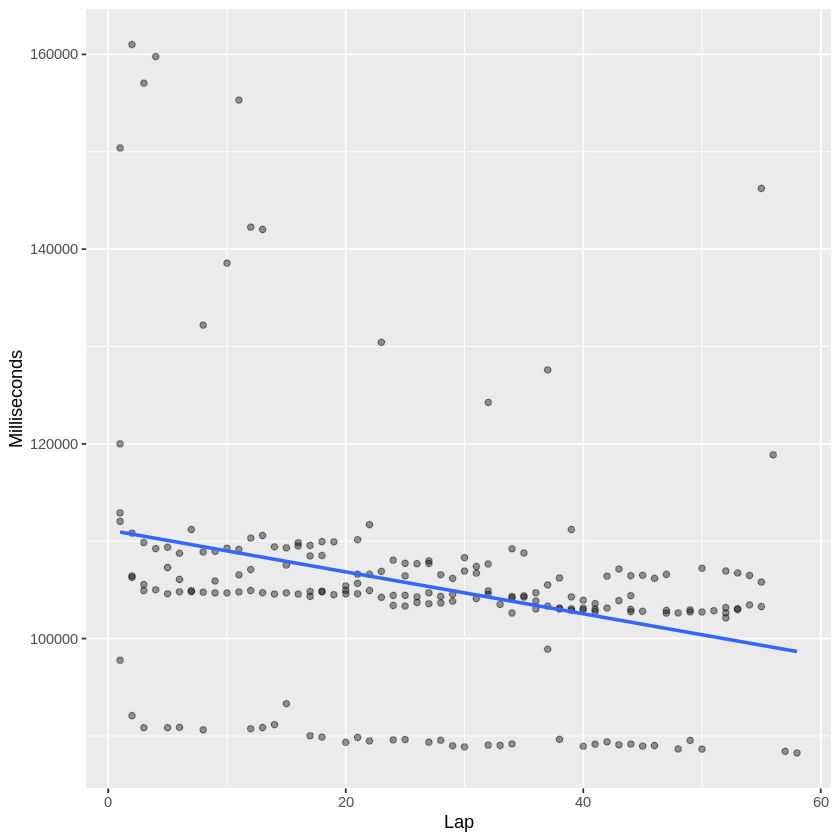

In [25]:
#22. Abu Dhabi

eo_uae <- oco_laps %>%
                filter(raceId %in% uae_race_ID) 

eo_uae_clean <- eo_uae %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
eo_uae_clean
eo_uae_clean_ID <- eo_uae_clean %>%
                        pull(raceId)


### SPLITTING DATA

eo_uae_races <- oco_laps %>%
                    filter(raceId %in% eo_uae_clean_ID)

formulaone_split <- initial_split(eo_uae_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_uae_prediction()